<a href="https://colab.research.google.com/github/omar4646/My_repository/blob/main/Classification_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Random linear classification algorith

In [2]:
np.random.seed(0)

In [3]:
dog_whisker_lenght = np.random.normal(loc=5, scale=1, size=10)
dog_ear_flappines = np.random.normal(loc=8, scale=1, size=10)

cat_whisker_lenght = np.random.normal(loc=8, scale=1, size=10)
cat_ear_flappines = np.random.normal(loc=5, scale=1, size=10)

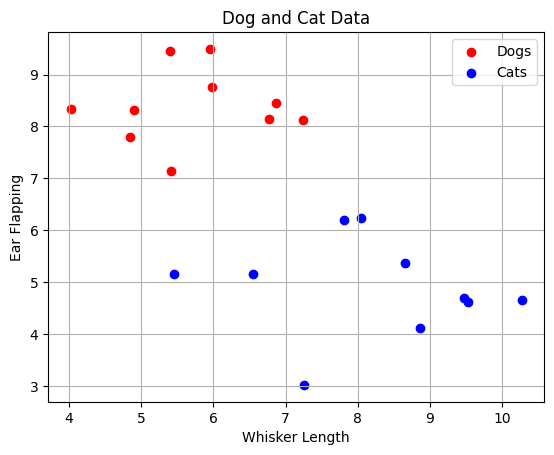

In [4]:
plt.scatter(dog_whisker_lenght, dog_ear_flappines, color='red', label='Dogs')
plt.scatter(cat_whisker_lenght, cat_ear_flappines, color='blue', label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping')
plt.title('Dog and Cat Data')
plt.legend()
plt.grid(True)
plt.show()

Let's outline a simple random linear classification algorithm. This is a basic conceptual algorithm, not a standard, widely-used one.

**Algorithm: Random Linear Classifier**

1.  **Initialization:**
    *   Initialize a weight vector $\mathbf{w} \in \mathbb{R}^d$ and a bias term $b \in \mathbb{R}$ with random values. These values can be drawn from a standard normal distribution, for example.
    *   $ \mathbf{w} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $
    *   $ b \sim \mathcal{N}(0, 1) $

2.  **Classification of a new data point $\mathbf{x}$:**
    *   Calculate the linear combination of the input features and the weights, and add the bias term:
        $ z = \mathbf{w}^T \mathbf{x} + b $
    *   Classify the data point based on the sign of $z$:
        $ \text{predicted class} = \begin{cases} +1 & \text{if } z \ge 0 \\ -1 & \text{if } z < 0 \end{cases} $

This algorithm simply assigns a random decision boundary and uses it for classification. It does not involve any training or learning from the data.

In [5]:
def random_linear_classifier(data_dog, data_cat, k, d):
  best_theta = None
  best_theta0 = None
  best_error = float('inf')

  for _ in range(k):
    theta = np.random.normal(size=d)
    theta0 = np.random.normal()

    error = compute_error(data_dog, data_cat, theta, theta0)
    if error < best_error:
      best_theta = theta
      best_theta0 = theta0
      best_error = error

  return best_theta, best_theta0, best_error

In [6]:
#Compute error
def compute_error(data_dog, data_cat, theta, theta0):
  error = 0
  for x_dog in data_dog:
    if np.dot(x_dog, theta) + theta0 <= 0:
      error += 1
  for x_cat in data_cat:
    if np.dot(x_cat, theta) + theta0 > 0:
      error += 1
  return error

In [7]:
data_dog = np.vstack([dog_whisker_lenght, dog_ear_flappines]).T
data_cat = np.vstack([cat_whisker_lenght, cat_ear_flappines]).T

In [8]:
k = 1000
d = 2
best_theta, best_theta0, best_error = random_linear_classifier(data_dog, data_cat, k, d)

In [9]:
print(best_theta, best_theta0, best_error)

[-1.07075262  1.05445173] -0.40317694697317963 0


In [10]:
x_val = np.linspace(2, 10, 100)
y_val = -(best_theta[0] * x_val + best_theta0) / best_theta[1]

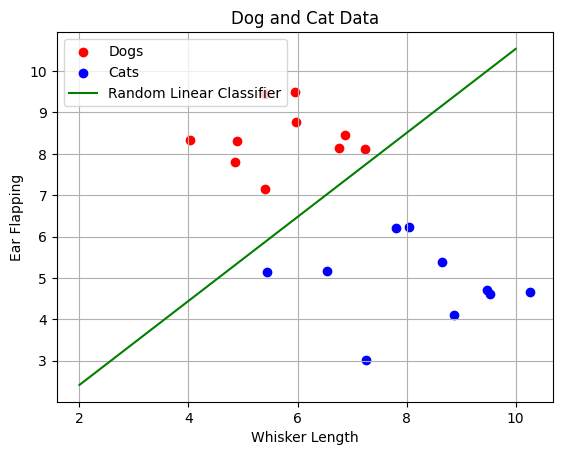

In [11]:
plt.scatter(dog_whisker_lenght, dog_ear_flappines, color='red', label='Dogs')
plt.scatter(cat_whisker_lenght, cat_ear_flappines, color='blue', label='Cats')
plt.plot(x_val, y_val, color='green', label='Random Linear Classifier')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping')
plt.title('Dog and Cat Data')
plt.legend()
plt.grid(True)
plt.show()

# Perceptron Learning Algorithm

Let's outline the Perceptron Learning Algorithm.

**Algorithm: Perceptron Learning Algorithm**

1. **Initialization:**
   * Initialize the weight vector $\mathbf{w} \in \mathbb{R}^d$ and bias term $b \in \mathbb{R}$ to zeros.
   $ \mathbf{w} = \mathbf{0} $
   $ b = 0 $

2. **Iteration:**
   * Iterate through the training data points $(\mathbf{x}_i, y_i)$, where $\mathbf{x}_i \in \mathbb{R}^d$ is the feature vector and $y_i \in \{-1, 1\}$ is the corresponding class label.

3. **Update Rule:**
   * For each data point $(\mathbf{x}_i, y_i)$:
     * Calculate the prediction: $ \hat{y}_i = \text{sign}(\mathbf{w}^T \mathbf{x}_i + b) $
     * If the prediction is incorrect ($y_i \hat{y}_i \le 0$), update the weights and bias:
       $ \mathbf{w} \leftarrow \mathbf{w} + y_i \mathbf{x}_i $
       $ b \leftarrow b + y_i $

4. **Termination:**
   * Repeat step 2 until all data points are correctly classified or a maximum number of iterations is reached.

This algorithm is guaranteed to converge for linearly separable data.

In [12]:
positive_points = np.array([(-2, 3), (0, 1), (2, -1)])
negative_points = np.array([(-2, 1), (0, -1), (2, -3)])

In [13]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

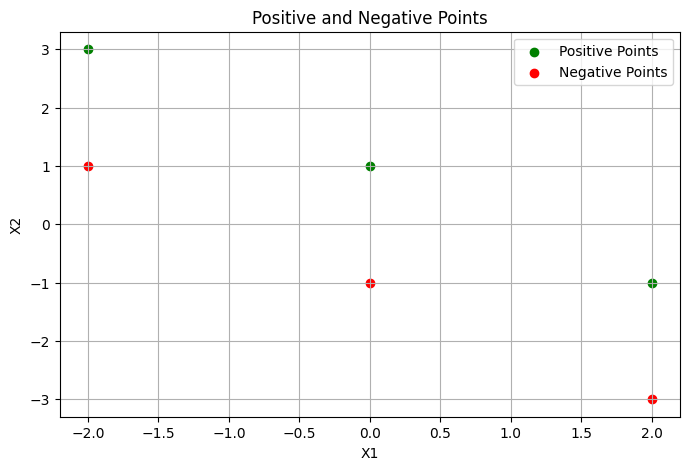

In [14]:
plt.figure(figsize=(8, 5))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='green', label='Positive Points')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Positive and Negative Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [16]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [17]:
y

array([ 1,  1,  1, -1, -1, -1])

In [18]:
def perceptron(X, y, epochs=100):
  theta = np.zeros(X.shape[1])
  theta0 = 0
  for t in range(epochs):
    for i, x1 in enumerate(X):
      if y[i] * (np.dot(theta, x1) + theta0) <= 0:
        theta += y[i] * x1
        theta0 += y[i]
        plot_decision_boundary(theta, theta0, t+1) # Plot after each update
        break # The perceptron algorithm updates weights and moves to the next epoch
  return theta, theta0

In [19]:
theta = np.zeros(2)
theta

array([0., 0.])

In [20]:
def plot_decision_boundary(theta, theta0, iteration):
  plt.figure(figsize=(8, 5))
  plt.scatter(positive_points[:, 0], positive_points[:, 1], color='green', label='Positive Points')
  plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')

  #Plot decision boundary
  x_values = np.linspace(-3, 3, 2)
  #Check for theta[1] to avoid division by 0 in case of vertical line
  if theta[1] != 0:
    y_values = -(theta[0] * x_values + theta0) / theta[1]
    plt.plot(x_values, y_values, 'b', label=f'Decision Boundary (Iteration {iteration})')
  else:
    x_val = -theta0 / theta[0]
    plt.axvline(x=x_val, color='b', linestyle='--', label=f'Decision Boundary (Iteration {iteration})')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')

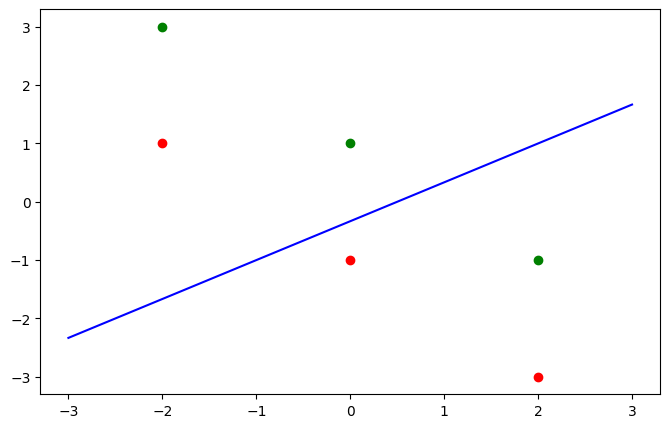

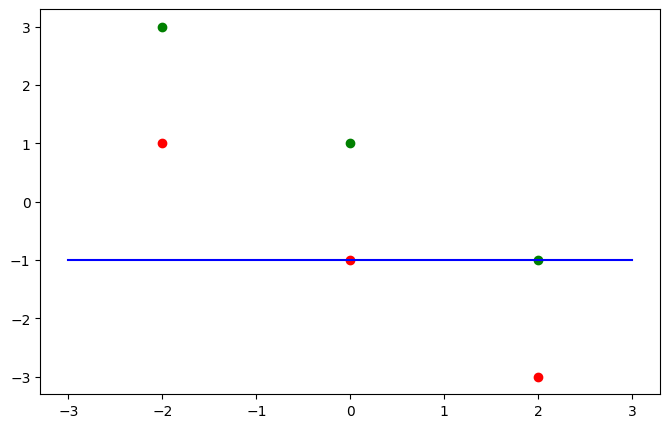

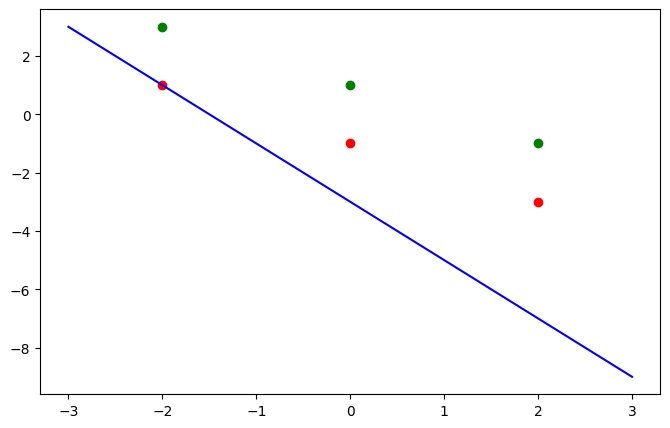

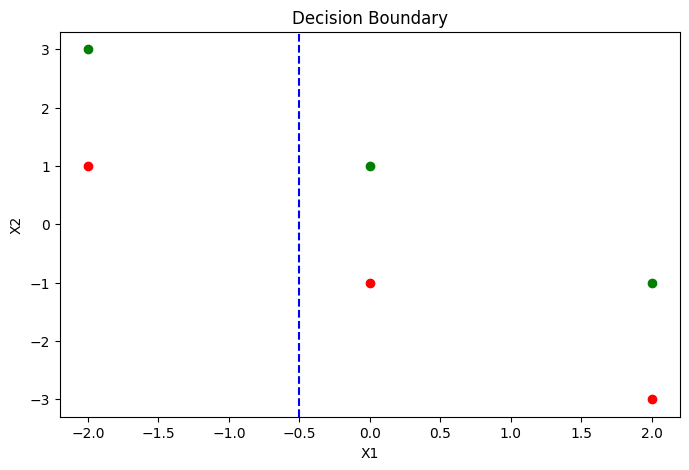

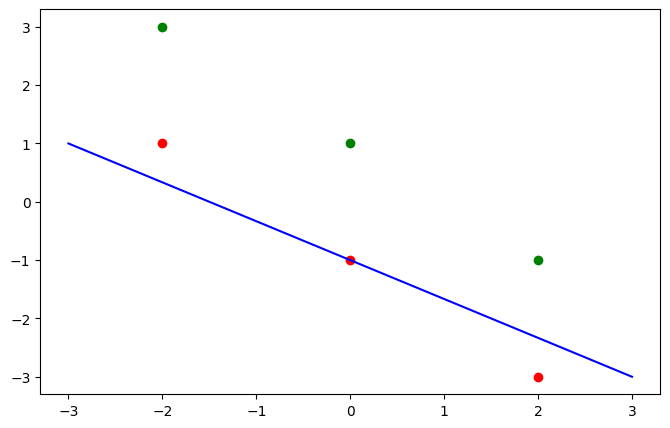

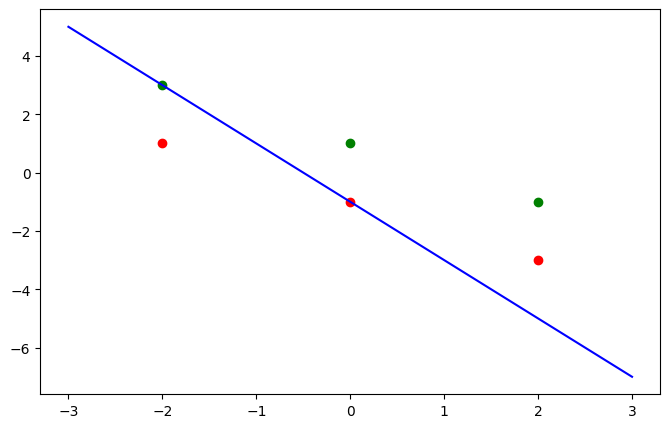

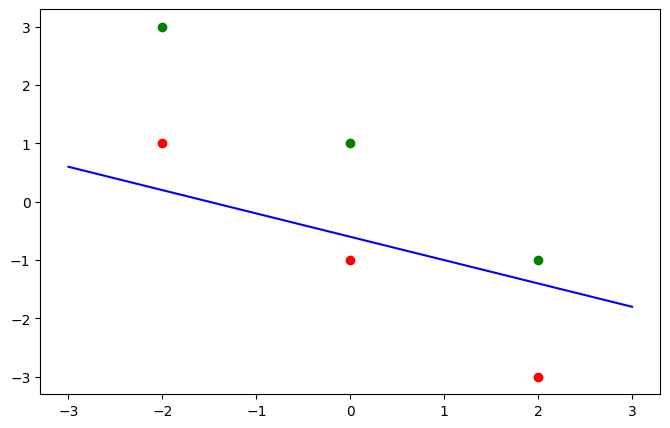

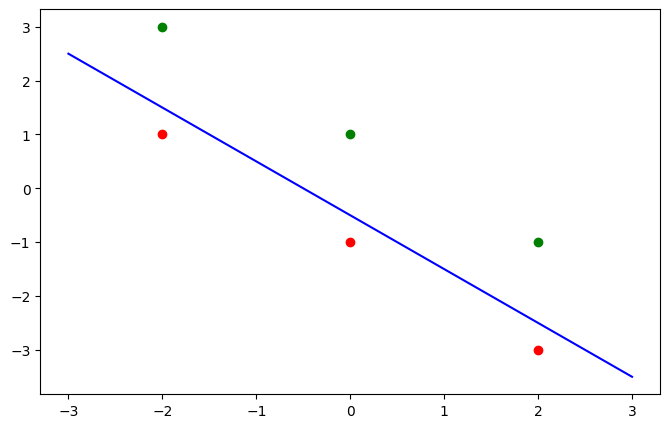

In [21]:
theta_final, theta0_final = perceptron(X, y, 10)

In [22]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [23]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_circles

# 1. Generate a linearly inseparable dataset in 2D (concentric circles)
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=42)

# 2. Define a feature transformation: (x1, x2) -> (x1, x2, x1^2 + x2^2)
X_transformed = np.c_[X, (X[:,0]**2 + X[:,1]**2)]

# 3. Plot the original 2D dataset
fig2d = go.Figure()
fig2d.add_trace(go.Scatter(
    x=X[y==0,0], y=X[y==0,1],
    mode="markers", name="Class 0",
    marker=dict(color="blue", size=7, line=dict(width=1, color="black"))
))
fig2d.add_trace(go.Scatter(
    x=X[y==1,0], y=X[y==1,1],
    mode="markers", name="Class 1",
    marker=dict(color="red", size=7, line=dict(width=1, color="black"))
))
fig2d.update_layout(
    title="Linearly Inseparable Dataset in 2D (Circles)",
    xaxis_title="x1",
    yaxis_title="x2",
    width=600, height=600
)

# 4. Plot the transformed dataset in 3D
fig3d = go.Figure()
fig3d.add_trace(go.Scatter3d(
    x=X_transformed[y==0,0], y=X_transformed[y==0,1], z=X_transformed[y==0,2],
    mode="markers", name="Class 0",
    marker=dict(color="blue", size=4)
))
fig3d.add_trace(go.Scatter3d(
    x=X_transformed[y==1,0], y=X_transformed[y==1,1], z=X_transformed[y==1,2],
    mode="markers", name="Class 1",
    marker=dict(color="red", size=4)
))
fig3d.update_layout(
    title="Dataset After Feature Transformation to 3D",
    scene=dict(
        xaxis_title="x1",
        yaxis_title="x2",
        zaxis_title="x1^2 + x2^2"
    ),
    width=700, height=700
)

# Show plots
fig2d.show()
fig3d.show()


In [24]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
df = {
    'employee_id': [10, 14, 15, 21, 9, 4, 13, 20],
    'gender': ['f', 'f', 'm', 'f', 'm', 'm', 'f', 'f'],
    'performance': ['good', 'bad', 'bad', 'good', 'good', 'bad', 'good', 'bad']}

df = pd.DataFrame(df)
columns_to_encode = df.select_dtypes(include = ['object']).columns.to_list()
encoder = OneHotEncoder(sparse_output = False)
one_hot_encoded = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(one_hot_encoded, columns = encoder.get_feature_names_out(columns_to_encode))
df = pd.concat([df, encoded_df], axis = 1)


In [25]:
df

,employee_id,gender,performance,gender_f,gender_m,performance_bad,performance_good
0,10,f,good,1.0,0.0,0.0,1.0
1,14,f,bad,1.0,0.0,1.0,0.0
2,15,m,bad,0.0,1.0,1.0,0.0
3,21,f,good,1.0,0.0,0.0,1.0
4,9,m,good,0.0,1.0,0.0,1.0
5,4,m,bad,0.0,1.0,1.0,0.0
6,13,f,good,1.0,0.0,0.0,1.0
7,20,f,bad,1.0,0.0,1.0,0.0


## Sigmoid Function

The sigmoid function, also known as the logistic function, is a type of activation function commonly used in artificial neural networks, particularly in the output layer for binary classification problems. It maps any real-valued number to a value between 0 and 1.

The mathematical definition of the sigmoid function is:

$ \sigma(z) = \frac{1}{1 + e^{-z}} $

Where:
- $ \sigma(z) $ is the output of the sigmoid function.
- $ z $ is the input to the function, which is typically the linear combination of inputs and weights in a neuron ($ z = \mathbf{w}^T \mathbf{x} + b $).
- $ e $ is the base of the natural logarithm (approximately 2.71828).

**Properties of the Sigmoid Function:**

- **Output Range:** The output of the sigmoid function is always between 0 and 1. This makes it suitable for representing probabilities.
- **Smooth Gradient:** The sigmoid function has a smooth, non-zero gradient across its range, which is beneficial for gradient-based optimization algorithms used in training neural networks.
- **S-shaped Curve:** The graph of the sigmoid function is an S-shape, where values close to 0 are mapped to values near 0.5, large positive values are mapped to values near 1, and large negative values are mapped to values near 0.

**Derivative of the Sigmoid Function:**

The derivative of the sigmoid function is often used in backpropagation for calculating gradients. The derivative can be expressed in terms of the function itself:

$ \sigma'(z) = \sigma(z) (1 - \sigma(z)) $

This property makes the computation of the gradient more efficient.

**Usage in Classification:**

In binary classification, the sigmoid function's output can be interpreted as the probability that the input belongs to the positive class (class 1). If the output is greater than or equal to 0.5, the input is typically classified as belonging to the positive class; otherwise, it is classified as belonging to the negative class (class 0).

In [26]:
x_values = np.linspace(-100, 100, 200)
x_values
count_pos = 0
count_neg = 0
for x in x_values:
  if x > 0:
    count_pos += 1
  else:
    count_neg += 1
print(count_pos, count_neg)
x_zeros = np.zeros(100)
x_ones = np.ones(100)
x_values = np.concatenate((x_zeros, x_ones))
print(x_values)

100 100
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


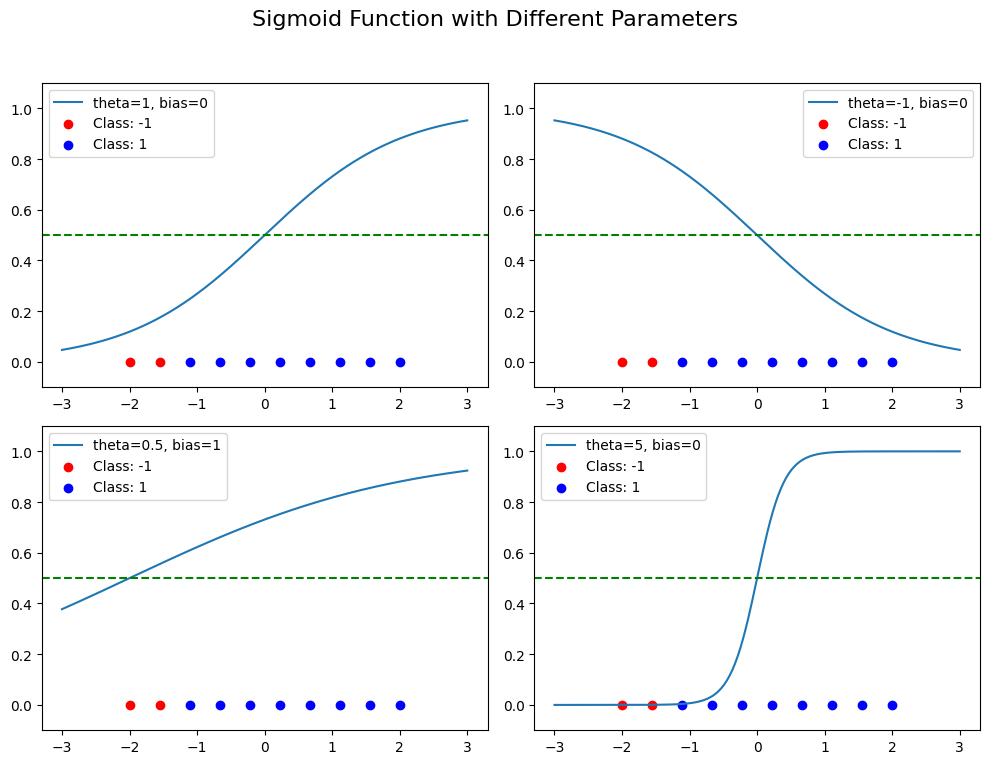

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x_values = np.linspace(-2, 2, 10)
x_zeros = np.zeros(5)
x_ones = np.ones(5)
y_labels = np.concatenate((x_zeros, x_ones))

params = [
    (1, 0),   #theta = 1, bias = 0
    (-1, 0),   #theta = -1, bias = 0
    (0.5, 1),  #theta = 0.5, bias = 1
    (5, 0)     #theta = 5, bias = 0
]

#create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for ax, (theta, bias) in zip(axs.ravel(), params):
    #compute the sigmoid for range of x values
    x_range = np.linspace(-3, 3, 300)
    x = theta * x_range + bias
    y = sigmoid(x)
    #plot the sigmoid curve
    ax.plot(x_range, y, label=f'theta={theta}, bias={bias}')
    #plot the data points
    ax.scatter(x_values[:2], x_values[:2] - x_values[:2], color='red', label='Class: -1')
    ax.scatter(x_values[2:], x_values[2:] - x_values[2:], color='blue', label='Class: 1')
    #format the plot
    ax.axhline(y = 0.5, color='green', linestyle='--') # decision threshold line 0.5
    ax.set_ylim(-0.1, 1.1)
    ax.legend()
# set overall figure title
fig.suptitle('Sigmoid Function with Different Parameters', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Binary Cross Entropy

Binary Cross Entropy (BCE) is a commonly used loss function in binary classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1. BCE is particularly useful when the model is trained to predict whether an instance belongs to one of two classes.

The mathematical formula for Binary Cross Entropy for a single instance is:

$ L(y, \hat{y}) = - [y \log(\hat{y}) + (1 - y) \log(1 - \hat{y})] $

Where:
- $ L $ is the loss for a single instance.
- $ y $ is the true label of the instance (either 0 or 1).
- $ \hat{y} $ is the predicted probability that the instance belongs to class 1.

For a dataset with $N$ instances, the average Binary Cross Entropy loss is calculated as:

$ L = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $

Where:
- $ N $ is the total number of instances in the dataset.
- $ y_i $ is the true label for the $i$-th instance.
- $ \hat{y}_i $ is the predicted probability for the $i$-th instance.

**Interpretation:**

- If the predicted probability $ \hat{y} $ is close to the true label $ y $, the loss is small.
- If the predicted probability $ \hat{y} $ is far from the true label $ y $, the loss is large.
- The logarithm functions penalize incorrect predictions heavily, especially when the predicted probability is confident but wrong (e.g., predicting a probability of 0.9 for an instance with a true label of 0).

BCE is minimized when the predicted probabilities align with the true labels. It is the standard loss function for models that output probabilities in binary classification, such as logistic regression and neural networks with a sigmoid output layer.

In [28]:
from keras.losses import binary_crossentropy

y_trues = np.array([0, 1, 1, 1, 0, 1,0])
y_preds = np.array([0.99, 0.67, 0.92, 0.90, 0.90, 0.94, 0.90])

def binary_cross_entropy(y_trues, y_preds):
    loss = - np.mean(y_trues * np.log(y_preds) + (1 - y_trues) * np.log(1 - y_preds))
    return loss

print('The loss from manual calculation: ', binary_cross_entropy(y_trues, y_preds))

loss = binary_crossentropy(y_trues, y_preds).numpy()
print('The loss from keras: ', loss)


The loss from manual calculation:  1.4087764952697535
The loss from keras:  1.4087764952697532


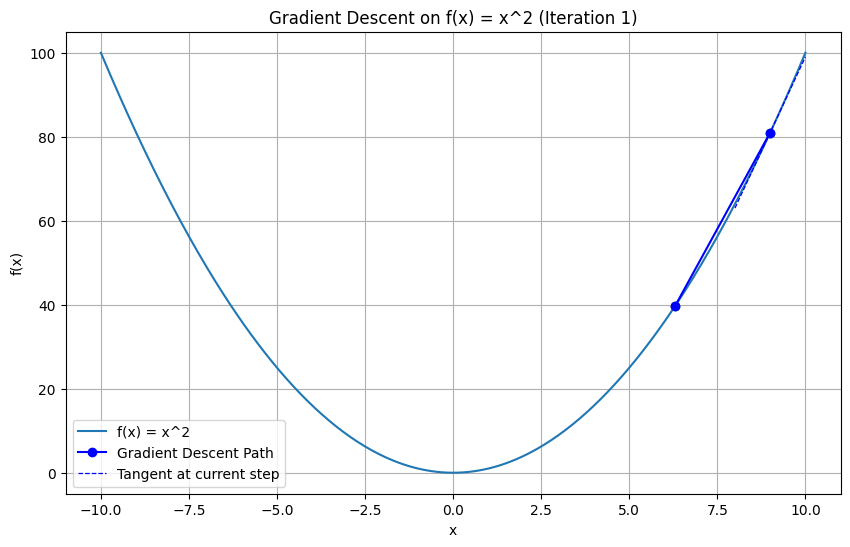

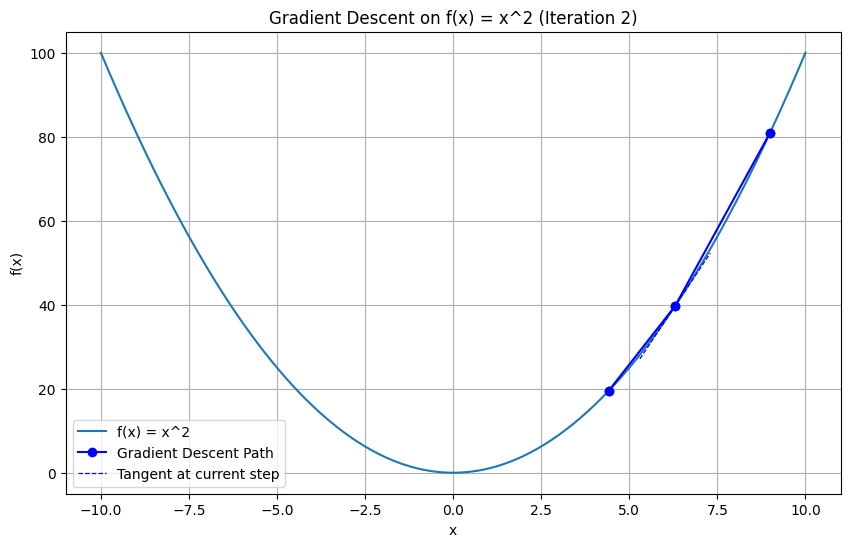

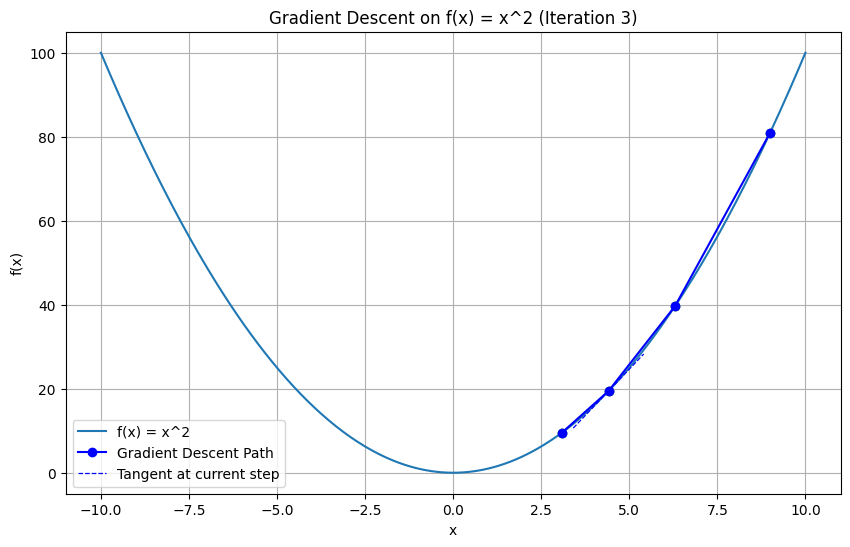

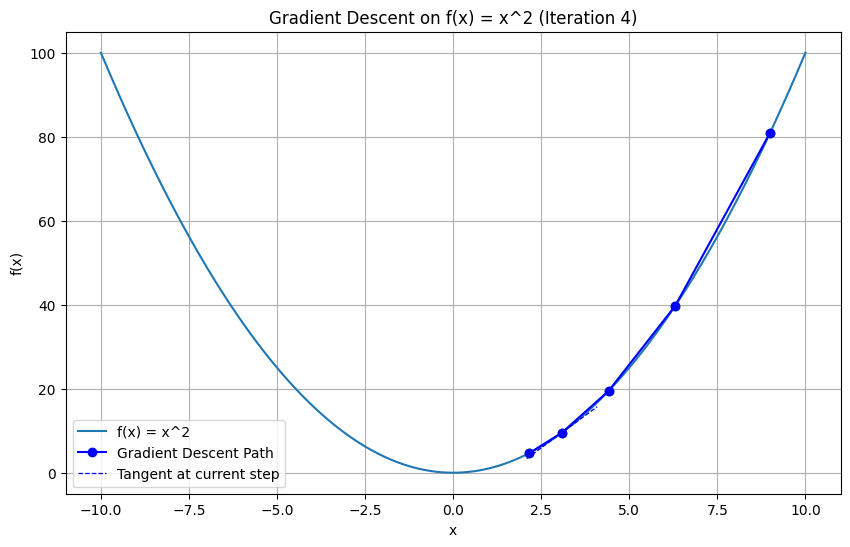

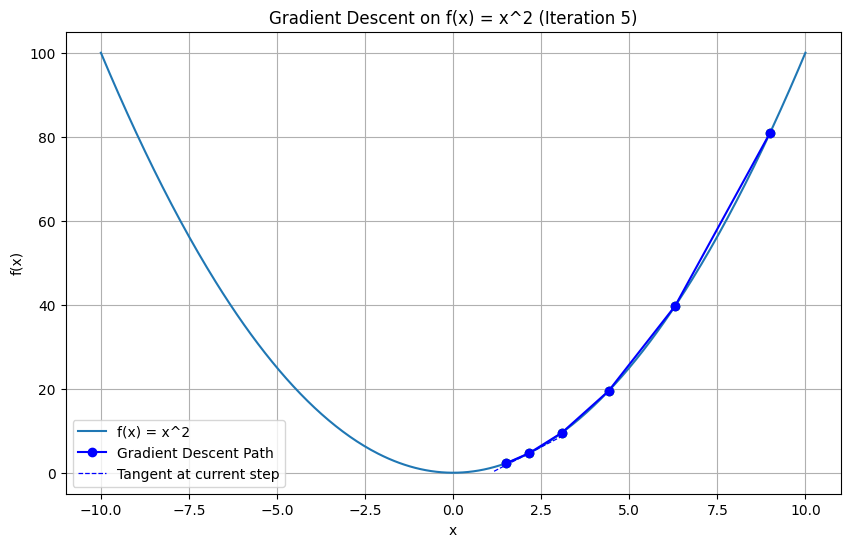

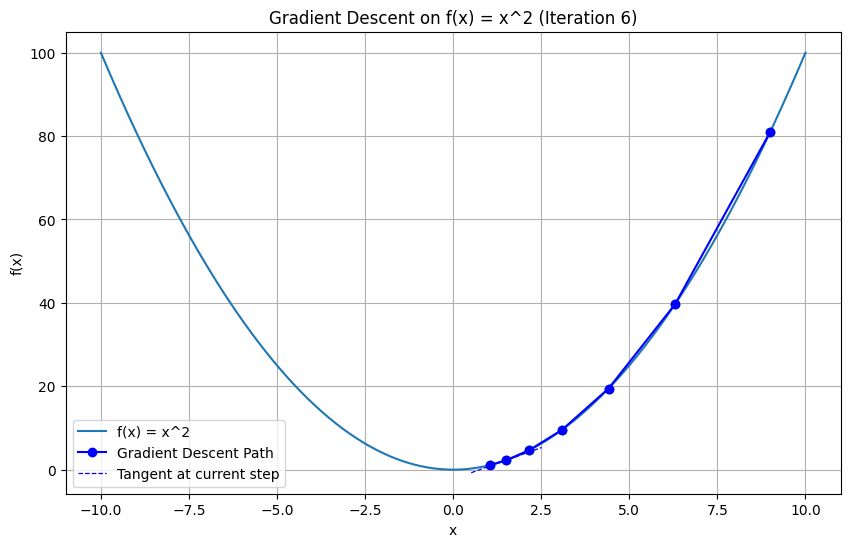

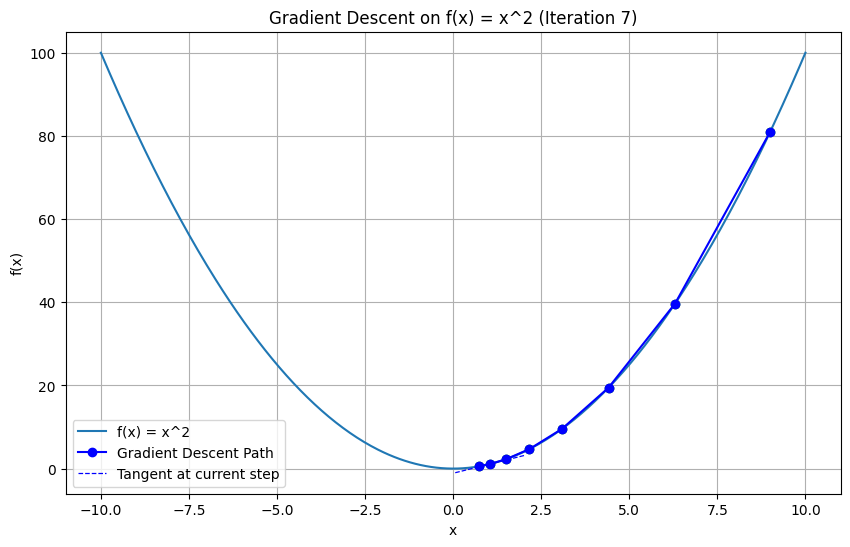

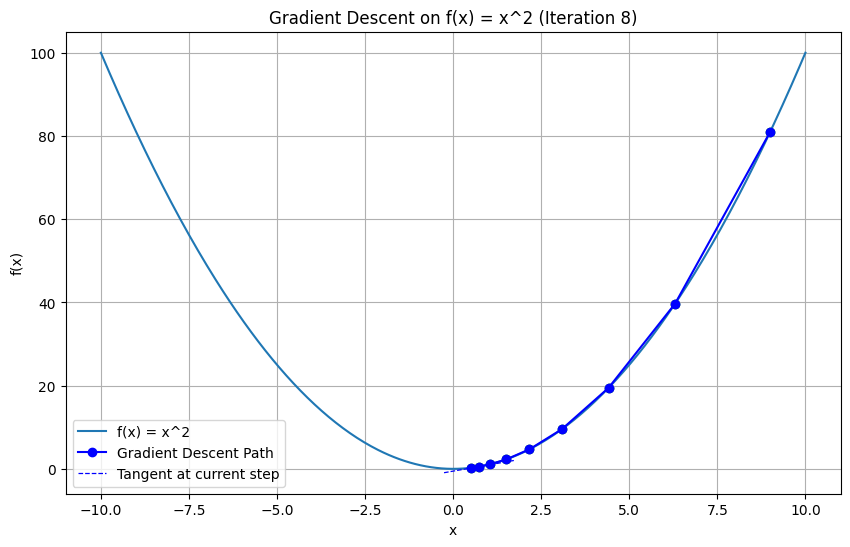

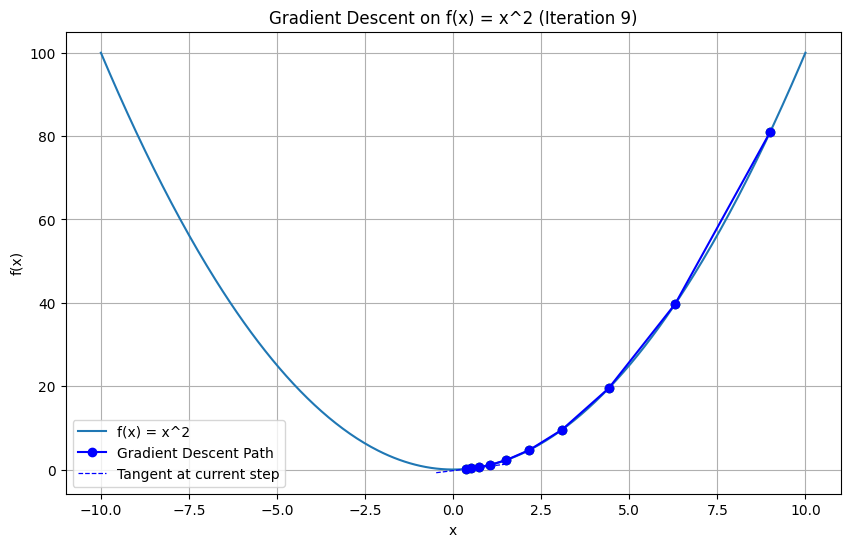

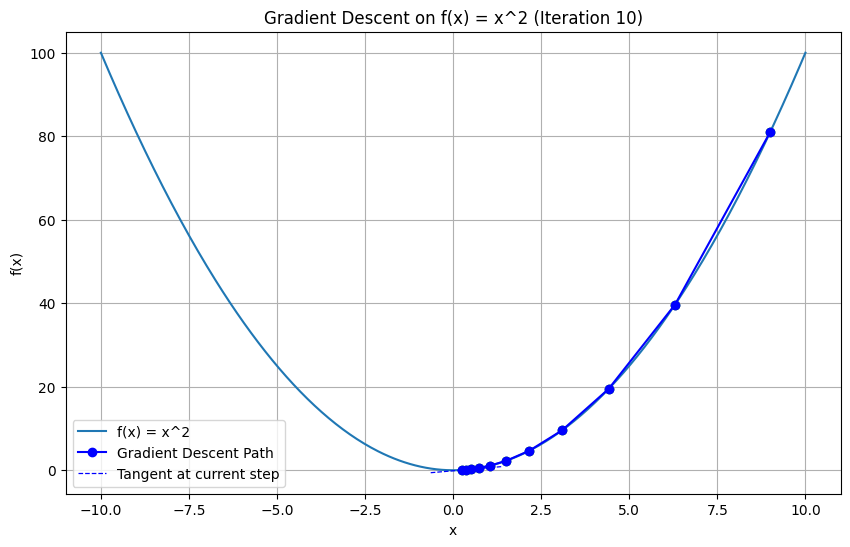

In [34]:
# define loss function
def f(x):
  return x**2
# define derivative of func
def df(x):
  return 2*x

# gradient descent parameters
x_start = 9
learning_rate = 0.15
n_iterations = 10

# for learning steps visualization
x_steps = [x_start]
y_steps = [f(x_start)]

# values for plotting the parabola
x = np.linspace(-10, 10, 400)
y = f(x)

for i in range(n_iterations):

  plt.figure(figsize=(10, 6))

  # plot the parabola
  plt.plot(x, y, label = 'f(x) = x^2')

  # current position on the parabola
  current_x = x_steps[-1]
  current_y = y_steps[-1]

  # calculate the gradient
  gradient = df(current_x)

  # update the position (gradient descent steps)
  next_x = current_x - learning_rate * gradient
  next_y = f(next_x)

  # save the new position
  x_steps.append(next_x)
  y_steps.append(next_y)

  # plot the current step path
  plt.scatter(x_steps, y_steps, color = 'green')
  plt.plot(x_steps, y_steps, linestyle = '-', marker = 'o', color = 'blue', label = 'Gradient Descent Path')

  # plot the tangent line (derivative at current point)
  tangent_x = np.linspace(current_x - 1, current_x + 1, 10)
  tangent_y = gradient * (tangent_x - current_x) + current_y

  plt.plot(tangent_x, tangent_y, linestyle = '--', color = 'blue', linewidth = 0.9, label = 'Tangent at current step')
  plt.title(f'Gradient Descent on f(x) = x^2 (Iteration {i+1})')
  plt.xlabel('x')
  plt.ylabel('f(x)')
  plt.legend()
  plt.grid(True)
  plt.show()